In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={"figure.figsize": (14,14)})
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings(action="always")

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.sample(7)

,g_x,g_y,TARGET
721,1.06,6.60,4
590,0.72,-2.40,0
33,-1.94,0.86,0
306,0.65,1.39,0
362,1.00,0.52,0
19,0.30,-0.14,0
235,0.30,-6.74,3


In [5]:
df.TARGET.unique()

array([0, 1, 2, 3, 4])

In [6]:
class_ = ["halt", "forward", "retreat", "left", "right"]

<AxesSubplot:xlabel='g_x', ylabel='g_y'>

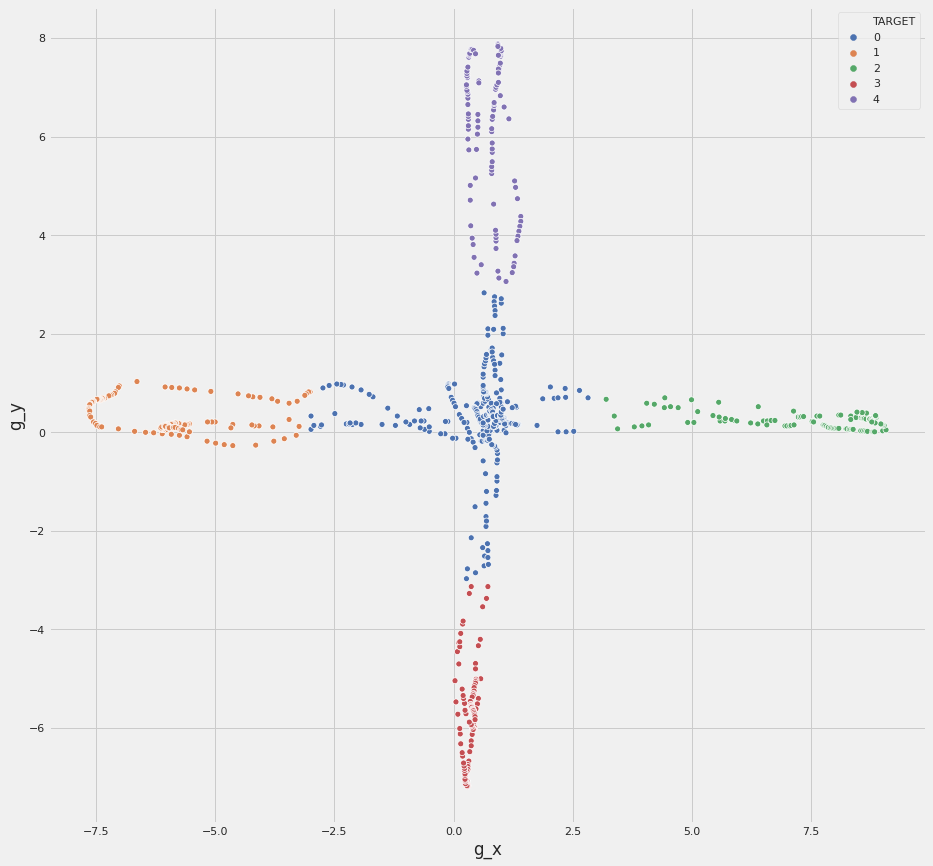

In [7]:
sns.scatterplot(x = "g_x", y = "g_y", hue="TARGET", data=df, palette="deep")

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
X = df.iloc[:, :-1] # independent var

y = df.iloc[:, -1] # Target

In [11]:
from sklearn.metrics import confusion_matrix

In [13]:
for d in range(1,5):
    tree = DecisionTreeClassifier(max_depth=d)
    tree.fit(X, y)
    y_pred = tree.predict(X)
    
    cm = confusion_matrix(y_pred, y)
    
    print(f"depth: {d} \nConfusing metrics:\n{cm}\n\n")

depth: 1 
Confusing metrics:
[[289   0 124 115 106]
 [  0 142   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


depth: 2 
Confusing metrics:
[[289   0   0 115 106]
 [  0 142   0   0   0]
 [  0   0 124   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]


depth: 3 
Confusing metrics:
[[289   0   0   0 106]
 [  0 142   0   0   0]
 [  0   0 124   0   0]
 [  0   0   0 115   0]
 [  0   0   0   0   0]]


depth: 4 
Confusing metrics:
[[289   0   0   0   0]
 [  0 142   0   0   0]
 [  0   0 124   0   0]
 [  0   0   0 115   0]
 [  0   0   0   0 106]]




In [14]:
import joblib

In [15]:
loaded_model = joblib.load("tree_clf.model")

In [16]:
y_pred = loaded_model.predict(X)

cm = confusion_matrix(y_pred, y)


In [17]:
cm

array([[289,   0,   0,   0,   0],
       [  0, 142,   0,   0,   0],
       [  0,   0, 124,   0,   0],
       [  0,   0,   0, 115,   0],
       [  0,   0,   0,   0, 106]])